# Testing FB Prophet

In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [5]:
df.Month = pd.DatetimeIndex(df.Month)
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [11]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


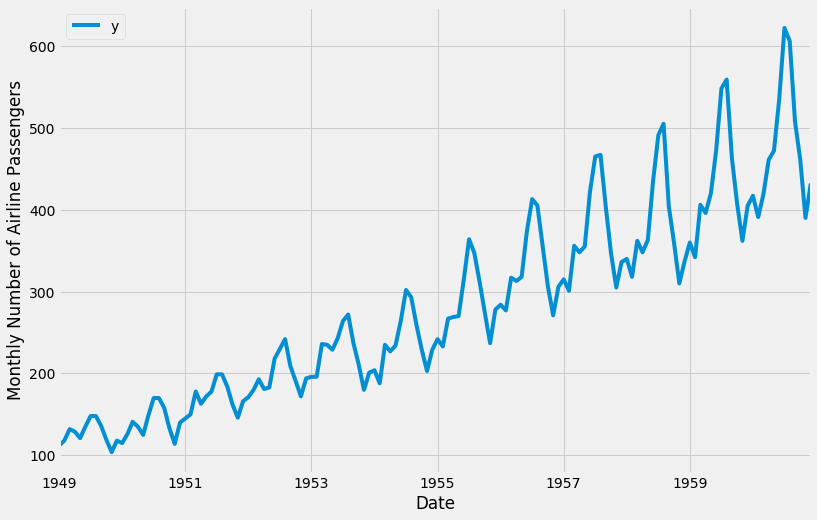

In [7]:
ax = df.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [8]:
my_model = Prophet(interval_width = 0.95)

In [9]:
my_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [14]:
forecast = my_model.predict(future_dates)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.787427,607.081998,693.540460
176,1963-09-01,602.260711,561.066720,646.208395
177,1963-10-01,566.233600,523.213912,612.339334
178,1963-11-01,534.258296,487.776655,579.470262
179,1963-12-01,563.846779,519.360600,610.317935


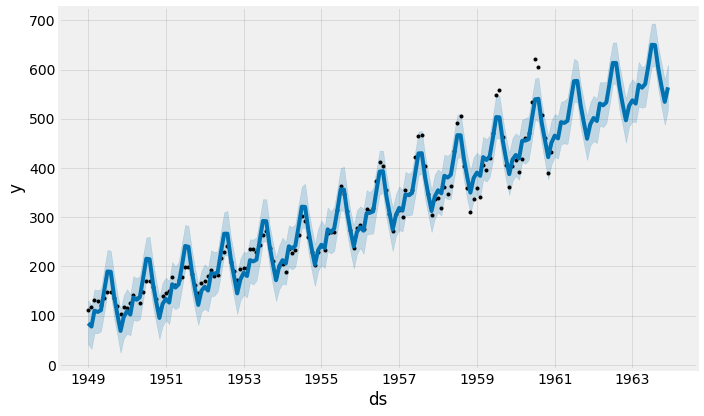

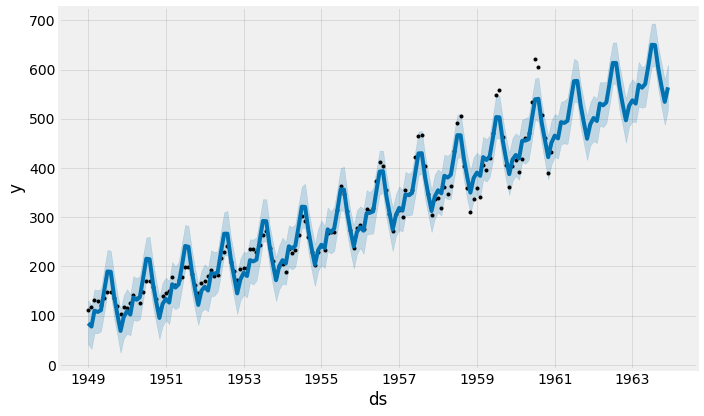

In [15]:
my_model.plot(forecast, uncertainty=True)

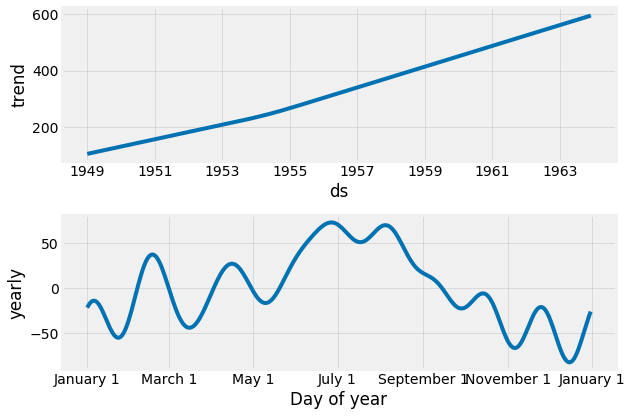

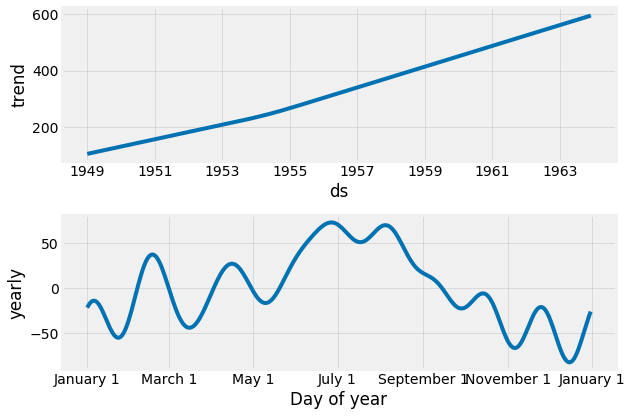

In [16]:
my_model.plot_components(forecast)